In [3]:
from pathlib import Path
import pandas as pd

DATA_RAW = Path("../data_raw")
sorted(DATA_RAW.glob("**/*.csv"))[:10]


[WindowsPath('../data_raw/euro_coaches.csv'),
 WindowsPath('../data_raw/euro_lineups.csv'),
 WindowsPath('../data_raw/euro_summary.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1960.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1964.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1968.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1972.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1976.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1980.csv'),
 WindowsPath('../data_raw/matches/matches/euro/1984.csv')]

In [4]:
match_path = Path("../data_raw/matches/matches/euro/1960.csv")
df = pd.read_csv(match_path)

df.head()

,id_match,home_team,away_team,home_team_code,away_team_code,home_score,away_score,home_penalty,away_penalty,home_score_total,...,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_lineups,away_lineups,home_coaches,away_coaches,events
0,4025,USSR,Yugoslavia,URS,YUG,1.0,1.0,NaN,NaN,2.0,...,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,"[{'country_code': 'URS', 'name': 'Lev Yashin',...","[{'country_code': 'SRB', 'name': 'Blagoje Vidi...",[],[],"[{'id': '39211', 'phase': 'EXTRA_TIME_SECOND_H..."
1,4024,Czechoslovakia,France,TCH,FRA,2.0,0.0,NaN,NaN,2.0,...,Stade de Marseille,Stade de Marseille,Stade de Marseille,Stade de Marseille,Orange Vélodrome,"[{'country_code': 'TCH', 'name': 'Viliam Schro...","[{'country_code': 'FRA', 'name': 'Georges Lami...","[{'country_code': 'TCH', 'country': 'Czechoslo...","[{'country_code': 'FRA', 'country': 'France', ...","[{'id': '35126', 'phase': 'SECOND_HALF', 'type..."
2,4023,Czechoslovakia,USSR,TCH,URS,0.0,3.0,NaN,NaN,0.0,...,Stade de Marseille,Stade de Marseille,Stade de Marseille,Stade de Marseille,Orange Vélodrome,"[{'country_code': 'TCH', 'name': 'Viliam Schro...","[{'country_code': 'URS', 'name': 'Lev Yashin',...","[{'country_code': 'TCH', 'country': 'Czechoslo...","[{'country_code': 'URS', 'country': 'Soviet Un...","[{'id': '10247', 'phase': 'SECOND_HALF', 'type..."
3,4022,France,Yugoslavia,FRA,YUG,4.0,5.0,NaN,NaN,4.0,...,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,"[{'country_code': 'FRA', 'name': 'Dominique Co...","[{'country_code': 'SRB', 'name': 'Milutin Šošk...",[],[],"[{'id': '10249', 'phase': 'SECOND_HALF', 'type..."


In [5]:
df.columns


Index(['id_match', 'home_team', 'away_team', 'home_team_code',
       'away_team_code', 'home_score', 'away_score', 'home_penalty',
       'away_penalty', 'home_score_total', 'away_score_total', 'winner',
       'winner_reason', 'year', 'date', 'date_time', 'utc_offset_hours',
       'group_name', 'matchday_name', 'condition_humidity', 'condition_pitch',
       'condition_temperature', 'condition_weather', 'condition_wind_speed',
       'status', 'type', 'round', 'round_mode', 'match_attendance',
       'stadium_id', 'stadium_country_code', 'stadium_capacity',
       'stadium_latitude', 'stadium_longitude', 'stadium_pitch_length',
       'stadium_pitch_width', 'goals', 'penalties_missed', 'penalties',
       'red_cards', 'game_referees', 'stadium_city', 'stadium_name',
       'stadium_name_media', 'stadium_name_official', 'stadium_name_event',
       'stadium_name_sponsor', 'home_lineups', 'away_lineups', 'home_coaches',
       'away_coaches', 'events'],
      dtype='object')

In [6]:
core_cols = [
    "id_match",
    "date",
    "home_team", "away_team",
    "home_team_code", "away_team_code",
    "home_score", "away_score"
]

df_core = df[core_cols].copy()
df_core.head()


,id_match,date,home_team,away_team,home_team_code,away_team_code,home_score,away_score
0,4025,1960-07-10,USSR,Yugoslavia,URS,YUG,1.0,1.0
1,4024,1960-07-09,Czechoslovakia,France,TCH,FRA,2.0,0.0
2,4023,1960-07-06,Czechoslovakia,USSR,TCH,URS,0.0,3.0
3,4022,1960-07-06,France,Yugoslavia,FRA,YUG,4.0,5.0


In [7]:
home_df = df_core.rename(columns={
    "home_team": "team",
    "away_team": "opponent",
    "home_team_code": "team_code",
    "away_team_code": "opponent_code",
    "home_score": "goals_for",
    "away_score": "goals_against"
})

home_df["home"] = 1
home_df.head()


,id_match,date,team,opponent,team_code,opponent_code,goals_for,goals_against,home
0,4025,1960-07-10,USSR,Yugoslavia,URS,YUG,1.0,1.0,1
1,4024,1960-07-09,Czechoslovakia,France,TCH,FRA,2.0,0.0,1
2,4023,1960-07-06,Czechoslovakia,USSR,TCH,URS,0.0,3.0,1
3,4022,1960-07-06,France,Yugoslavia,FRA,YUG,4.0,5.0,1


In [8]:
away_df = df_core.rename(columns={
    "away_team": "team",
    "home_team": "opponent",
    "away_team_code": "team_code",
    "home_team_code": "opponent_code",
    "away_score": "goals_for",
    "home_score": "goals_against"
})

away_df["home"] = 0
away_df.head()


,id_match,date,opponent,team,opponent_code,team_code,goals_against,goals_for,home
0,4025,1960-07-10,USSR,Yugoslavia,URS,YUG,1.0,1.0,0
1,4024,1960-07-09,Czechoslovakia,France,TCH,FRA,2.0,0.0,0
2,4023,1960-07-06,Czechoslovakia,USSR,TCH,URS,0.0,3.0,0
3,4022,1960-07-06,France,Yugoslavia,FRA,YUG,4.0,5.0,0


In [9]:
team_matches = pd.concat([home_df, away_df], ignore_index=True)
team_matches.head(10)


,id_match,date,team,opponent,team_code,opponent_code,goals_for,goals_against,home
0,4025,1960-07-10,USSR,Yugoslavia,URS,YUG,1.0,1.0,1
1,4024,1960-07-09,Czechoslovakia,France,TCH,FRA,2.0,0.0,1
2,4023,1960-07-06,Czechoslovakia,USSR,TCH,URS,0.0,3.0,1
3,4022,1960-07-06,France,Yugoslavia,FRA,YUG,4.0,5.0,1
4,4025,1960-07-10,Yugoslavia,USSR,YUG,URS,1.0,1.0,0
5,4024,1960-07-09,France,Czechoslovakia,FRA,TCH,0.0,2.0,0
6,4023,1960-07-06,USSR,Czechoslovakia,URS,TCH,3.0,0.0,0
7,4022,1960-07-06,Yugoslavia,France,YUG,FRA,5.0,4.0,0


In [10]:
team_matches["goal_diff"] = team_matches["goals_for"] - team_matches["goals_against"]

team_matches["points"] = team_matches.apply(
    lambda r: 3 if r.goals_for > r.goals_against else (1 if r.goals_for == r.goals_against else 0),
    axis=1
)

team_matches[["team", "opponent", "goals_for", "goals_against", "goal_diff", "points"]].head()


,team,opponent,goals_for,goals_against,goal_diff,points
0,USSR,Yugoslavia,1.0,1.0,0.0,1
1,Czechoslovakia,France,2.0,0.0,2.0,3
2,Czechoslovakia,USSR,0.0,3.0,-3.0,0
3,France,Yugoslavia,4.0,5.0,-1.0,0
4,Yugoslavia,USSR,1.0,1.0,0.0,1


In [11]:
team_matches["date"] = pd.to_datetime(team_matches["date"])

team_matches = team_matches.sort_values(["team", "date"])
team_matches.head()


,id_match,date,team,opponent,team_code,opponent_code,goals_for,goals_against,home,goal_diff,points
2,4023,1960-07-06,Czechoslovakia,USSR,TCH,URS,0.0,3.0,1,-3.0,0
1,4024,1960-07-09,Czechoslovakia,France,TCH,FRA,2.0,0.0,1,2.0,3
3,4022,1960-07-06,France,Yugoslavia,FRA,YUG,4.0,5.0,1,-1.0,0
5,4024,1960-07-09,France,Czechoslovakia,FRA,TCH,0.0,2.0,0,-2.0,0
6,4023,1960-07-06,USSR,Czechoslovakia,URS,TCH,3.0,0.0,0,3.0,3


In [12]:
df.shape, team_matches.shape

((4, 52), (8, 11))

In [13]:
euro_files = sorted(Path("../data_raw/matches/matches/euro").glob("*.csv"))
len(euro_files), euro_files[:5]


(17,
 [WindowsPath('../data_raw/matches/matches/euro/1960.csv'),
  WindowsPath('../data_raw/matches/matches/euro/1964.csv'),
  WindowsPath('../data_raw/matches/matches/euro/1968.csv'),
  WindowsPath('../data_raw/matches/matches/euro/1972.csv'),
  WindowsPath('../data_raw/matches/matches/euro/1976.csv')])

In [14]:
def build_team_matches(df):
    core_cols = [
        "id_match",
        "date",
        "home_team", "away_team",
        "home_team_code", "away_team_code",
        "home_score", "away_score"
    ]
    
    df_core = df[core_cols].copy()

    home_df = df_core.rename(columns={
        "home_team": "team",
        "away_team": "opponent",
        "home_team_code": "team_code",
        "away_team_code": "opponent_code",
        "home_score": "goals_for",
        "away_score": "goals_against"
    })
    home_df["home"] = 1

    away_df = df_core.rename(columns={
        "away_team": "team",
        "home_team": "opponent",
        "away_team_code": "team_code",
        "home_team_code": "opponent_code",
        "away_score": "goals_for",
        "home_score": "goals_against"
    })
    away_df["home"] = 0

    team_matches = pd.concat([home_df, away_df], ignore_index=True)
    
    team_matches["goal_diff"] = team_matches["goals_for"] - team_matches["goals_against"]
    team_matches["points"] = team_matches.apply(
        lambda r: 3 if r.goals_for > r.goals_against else (1 if r.goals_for == r.goals_against else 0),
        axis=1
    )

    team_matches["date"] = pd.to_datetime(team_matches["date"])
    return team_matches


In [15]:
all_team_matches = []

for path in euro_files:
    df_year = pd.read_csv(path)
    tm = build_team_matches(df_year)
    tm["season"] = path.stem  # year from filename
    all_team_matches.append(tm)

euro_team_matches = pd.concat(all_team_matches, ignore_index=True)
euro_team_matches.shape


(776, 12)

In [16]:
euro_team_matches["team"].nunique(), euro_team_matches["season"].nunique()


(41, 17)

In [17]:
euro_team_matches = euro_team_matches.sort_values(["team", "date"])

euro_team_matches["days_since_last_match"] = (
    euro_team_matches.groupby("team")["date"]
    .diff()
    .dt.days
)

euro_team_matches["matches_last_7_days"] = (
    euro_team_matches
    .groupby("team")["date"]
    .rolling("7D")
    .count()
    .reset_index(level=0, drop=True)
    - 1
)


ValueError: window must be an integer 0 or greater

In [18]:
# Ensure date is datetime
euro_team_matches["date"] = pd.to_datetime(euro_team_matches["date"])

# Sort for time-series features
euro_team_matches = euro_team_matches.sort_values(["team", "date"]).reset_index(drop=True)

# Days since last match (works as-is)
euro_team_matches["days_since_last_match"] = (
    euro_team_matches.groupby("team")["date"].diff().dt.days
)

# Rolling match counts in last 7 days (time-based)
euro_team_matches["matches_last_7_days"] = (
    euro_team_matches
    .set_index("date")
    .groupby("team")["id_match"]
    .rolling("7D")
    .count()
    .reset_index(level=0, drop=True)
    .reset_index(drop=True)
    - 1
)

# Rolling match counts in last 14 days
euro_team_matches["matches_last_14_days"] = (
    euro_team_matches
    .set_index("date")
    .groupby("team")["id_match"]
    .rolling("14D")
    .count()
    .reset_index(level=0, drop=True)
    .reset_index(drop=True)
    - 1
)

euro_team_matches[["team","date","days_since_last_match","matches_last_7_days","matches_last_14_days"]].head(12)


,team,date,days_since_last_match,matches_last_7_days,matches_last_14_days
0,Albania,2016-06-11,NaN,0.0,0.0
1,Albania,2016-06-15,4.0,1.0,1.0
2,Albania,2016-06-19,4.0,1.0,2.0
3,Albania,2024-06-15,2918.0,0.0,0.0
4,Albania,2024-06-19,4.0,1.0,1.0
5,Albania,2024-06-24,5.0,1.0,2.0
6,Austria,2008-06-08,NaN,0.0,0.0
7,Austria,2008-06-12,4.0,1.0,1.0
8,Austria,2008-06-16,4.0,1.0,2.0
9,Austria,2016-06-14,2920.0,0.0,0.0


In [19]:
euro_team_matches["matches_last_7_days"].describe()


count    776.000000
mean       0.761598
std        0.514180
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: matches_last_7_days, dtype: float64

In [20]:
euro_team_matches["days_since_last_match"].describe()

count      735.000000
mean       511.114286
std       1323.170308
min          2.000000
25%          4.000000
50%          4.000000
75%          6.000000
max      16068.000000
Name: days_since_last_match, dtype: float64

In [21]:
# Create rest buckets
euro_team_matches["rest_bucket"] = pd.cut(
    euro_team_matches["days_since_last_match"],
    bins=[0, 2, 4, 6, 10, 30, 10000],
    labels=["0-2", "3-4", "5-6", "7-10", "11-30", "30+"]
)

euro_team_matches[["team", "days_since_last_match", "rest_bucket"]].head(10)


,team,days_since_last_match,rest_bucket
0,Albania,NaN,NaN
1,Albania,4.0,3-4
2,Albania,4.0,3-4
3,Albania,2918.0,30+
4,Albania,4.0,3-4
5,Albania,5.0,5-6
6,Austria,NaN,NaN
7,Austria,4.0,3-4
8,Austria,4.0,3-4
9,Austria,2920.0,30+


In [22]:
rest_performance = (
    euro_team_matches
    .groupby("rest_bucket")
    .agg(
        avg_points=("points", "mean"),
        avg_goal_diff=("goal_diff", "mean"),
        matches=("points", "count")
    )
    .reset_index()
)
rest_performance


C:\Users\acer\AppData\Local\Temp\ipykernel_31384\769188142.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("rest_bucket")


,rest_bucket,avg_points,avg_goal_diff,matches
0,0-2,1.333333,0.000000,3
1,3-4,1.361386,0.056931,404
2,5-6,1.243421,-0.217105,152
3,7-10,1.846154,0.769231,13
4,11-30,NaN,NaN,0
5,30+,1.432099,0.086420,162


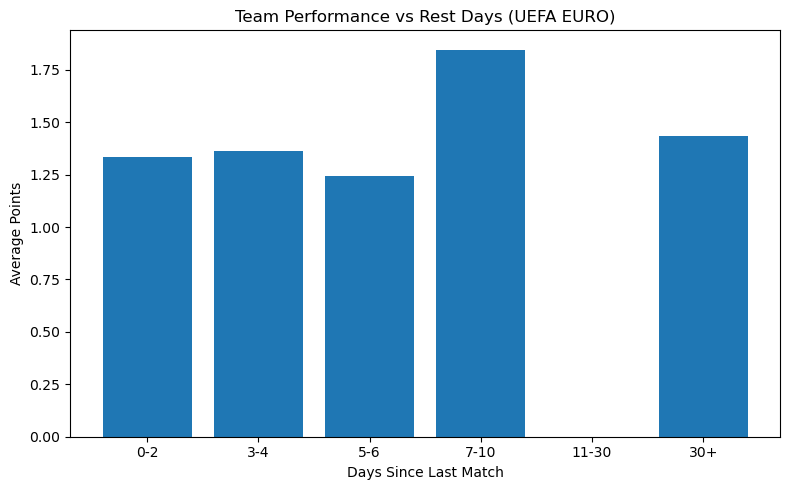

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(rest_performance["rest_bucket"], rest_performance["avg_points"])
plt.xlabel("Days Since Last Match")
plt.ylabel("Average Points")
plt.title("Team Performance vs Rest Days (UEFA EURO)")
plt.tight_layout()
plt.show()


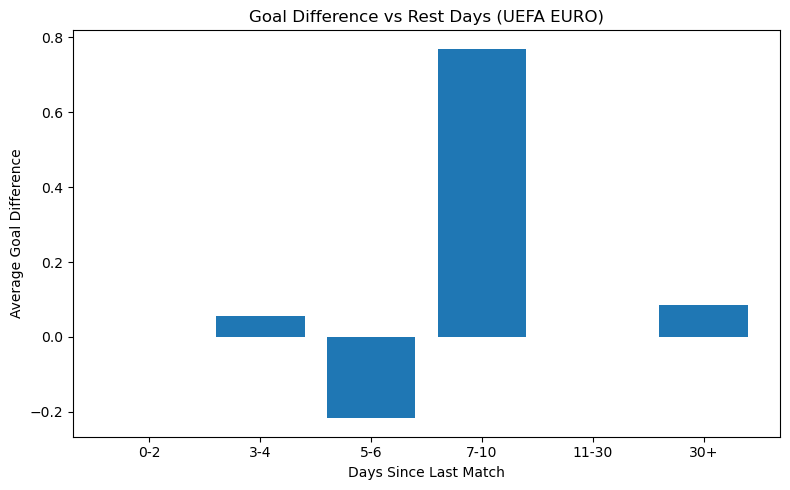

In [24]:
plt.figure(figsize=(8,5))
plt.bar(rest_performance["rest_bucket"], rest_performance["avg_goal_diff"])
plt.xlabel("Days Since Last Match")
plt.ylabel("Average Goal Difference")
plt.title("Goal Difference vs Rest Days (UEFA EURO)")
plt.tight_layout()
plt.show()


In [25]:

rest_performance.to_csv("../data/rest_vs_performance.csv", index=False)


plt.figure(figsize=(8,5))
plt.bar(rest_performance["rest_bucket"], rest_performance["avg_points"])
plt.xlabel("Days Since Last Match")
plt.ylabel("Average Points")
plt.title("Team Performance vs Rest Days (UEFA EURO)")
plt.tight_layout()
plt.savefig("../visuals/rest_vs_points.png")
plt.close()


In [26]:
git status
git add notebooks data visuals README.md
git commit -m "Add match congestion analysis and performance visualizations"
git push


SyntaxError: invalid syntax (2585196605.py, line 1)